<table style="background-color:#F5F5F5;" width="100%">
<tr><td style="background-color:#F5F5F5;"><img src="../images/logo.png" width="150" align='right'/></td></tr>     <tr><td>
            <h2><center>Aprendizagem Automática em Engenharia Biomédica</center></h2>
            <h3><center>1st Semester - 2024/2025</center></h3>
            <h4><center>Universidade Nova de Lisboa - Faculdade de Ciências e Tecnologia</center></h4>
</td></tr>
    <tr><td><h2><b><center>Lab 2 - Data Preparation</center></b></h2>
    <h4><i><b><center>Loading, Visualizing, Describing, Split and Encoding</center></b></i></h4></td></tr>
</table>

## 1. Introduction to Data Preparation for Machine Learning
Data preparation is a crucial step in the machine learning pipeline. Raw data often contains inconsistencies, missing values, and outliers, which can negatively impact the performance of machine learning models. To build robust and reliable models, it's essential to clean and transform the data so that it is suitable for analysis.

In today's class, we will discuss the importance of data preparation and introduce pandas, a powerful Python library used for data manipulation and analysis. We will also cover the common steps involved in preparing data for machine learning, such as handling missing values, normalizing data, and encoding categorical variables.

### 1.1 Why is Data Preparation Important?
Machine learning algorithms rely on high-quality data to make accurate predictions. __If the data is noisy, incomplete, or poorly formatted, the model's performance can degrade significantly__. Some reasons why data preparation is important include:

* __Improving Model Accuracy__: Clean and well-structured data allows machine learning models to generalize better and make more accurate predictions.
* __Handling Missing or Inconsistent Data__: Missing data and inconsistencies can skew results and lead to poor model performance. Proper handling ensures data integrity.
* __Feature Engineering__: Creating new features or transforming existing ones helps the model better understand the underlying patterns in the data.
* __Reducing Model Complexity__: Removing irrelevant or redundant data simplifies the model, reducing the risk of overfitting and improving interpretability.

### 1.2 Pandas: A Python Module for Data Analysis and Data Manipulation 
Pandas is an open-source Python library that provides fast, flexible, and expressive data structures designed to make data manipulation and analysis easy. It is widely used in data science and machine learning due to its rich set of features for handling data, such as:

* __Data Reading and Writing__: Reading and writing data from various file formats (CSV, Excel, SQL, etc.)
* __Data Cleaning__: Handling missing data, outliers, duplicates, etc.
* __Data Transformation__: Applying mathematical functions, reshaping data, etc.
* __Data visualization__: Integrating well with libraries like Matplotlib and Seaborn for plotting

## 2. Getting Started with Pandas

### 2.1 Installing and Importing Pandas
Before we can use pandas, we need to make sure it is installed. Depending on your setup, there are two common ways to install it: using __pip__ or __Anaconda__.

_Note_: __This step is only needed if you havent installed pandas yet!__

__Installing with pip__

If you are working in a standard Python environment (e.g., in a Jupyter notebook or directly from Python), you can install pandas using __pip__:

In [1]:
# YOU ONLY NEED TO RUN THIS LINE OF CODE IF YOU HAVEN'T INSTALLED PANDAS YET
# you can uncomment the line below and run it if you want to install pandas using pip directly within the notebook
# !pip install pandas

__Installing with Anaconda__

If you are using __Anaconda__, you will need to run the following command in the __Conda Prompt__ (__not in the Jupyter notebook__):

1. Open the __Anaconda Prompt__ from your start menu.
2. Run the following command:

_conda install pandas_

Alternatively, you can use __Anaconda Navigator to install pandas via the graphical interface__.

Once pandas is installed (either with pip or conda), you can import it into your notebook using:
(We will also import some other packages that we will need for today. If you haven't installed these packaes yet you can use the same approach described above)

In [2]:
import pandas as pd  # data science
import numpy as np # mathematics
import matplotlib.pyplot as plt # plotting

### 2.2 Basic Data Structures in Pandas.

Pandas provides two primary data structures for working with data: [__pandas.Series__](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) and [__pandas.DataFrame__](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

These structures are highly efficient for manipulating and analyzing large datasets, allowing for operations like filtering, grouping, and merging with minimal code.

#### 2.2.1 Series

A __pandas.Series__ is a one-dimensional labeled array that can hold any data type (e.g., integers, floats, strings, or even Python objects). It is similar to a list or array, but with an associated index, which makes it easier to access specific elements based on a label. Think of a Series as a single column of data.

Here is how you can create a simple pandas.Series:

In [3]:
# define data
data = [10, 20, 30, 40, 50]

# pass the data into a pandas.Series object
s = pd.Series(data)

# Displaying the Series
print(s)

0    10
1    20
2    30
3    40
4    50
dtype: int64


In the example above, the numbers __0 to 4 represent the index of each element__, and the values are the data stored in the Series.

##### 1.3.2.2 DataFrame

A __pandas.DataFrame__ a two-dimensional, tabular data structure that contains rows and columns, similar to a spreadsheet or SQL table. Each column in a DataFrame is a Series, and the rows can be indexed by labels. DataFrames are flexible and can store data of different types (integers, floats, strings) across various columns. A DataFrame can be created from dictionaries, lists, or by reading in a file (e.g., a CSV file).

Here’s how you can create a pandas.DataFrame with three columns:

In [4]:
# define data as dictionary where each key-value pair represents a column
# the key of the dictionary will be used as the column name.
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, 30, 35, 40],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston']
}

# pas dictionary to DataFrame object
df = pd.DataFrame(data)

# a Jupyter Notebook has the convenience that it prints out a the last variable. 
# Thus we can display the DataFrame in a nice format by just calling the variable
df

,Name,Age,City
0,Alice,25,New York
1,Bob,30,Los Angeles
2,Charlie,35,Chicago
3,David,40,Houston


In the example above, the numbers __0 to 3 represent the index of each row__, and the values are the data stored in the DataFrame.

### 2.2.3 Accessing Data in a DataFrame
Once you have created a DataFrame, you can access the data using column labels or row indices. Here are a few examples:

__1. Accessing a single column__:

In [5]:
# to access a column of a DataFrame you use the same notation as a for a dictionary. The column name functions as the key. Be careful with typos!
# a column is a pandas.Series
names_series = df['Name']

# print the column
print("The names_series contains: \n{}".format(names_series))

# print the type
print("\nThe type of name_series is: {}".format(type(names_series)))

The names_series contains: 
0      Alice
1        Bob
2    Charlie
3      David
Name: Name, dtype: object

The type of name_series is: <class 'pandas.core.series.Series'>


__2. Accessing multiple columns__:

_Note_: When accessing a column of a DataFrame a pandas.Series is returned. The index of this series is the index of the DataFrame.

In [6]:
# Accessing the 'Name' and 'City' columns
# This will return a DataFrame object
sub_df = df[['Name', 'City']]

# printing the type of sub_df
print("The type of the sub_df is: {}".format(type(sub_df)))

# printing the sub_df using jupyter notebook automatic print
sub_df

The type of the sub_df is: <class 'pandas.core.frame.DataFrame'>


,Name,City
0,Alice,New York
1,Bob,Los Angeles
2,Charlie,Chicago
3,David,Houston


__3. Accessing a row__:

_Note_: when accessing a row of a DataFrame a pandas.Series is returned. __The index of this series are the column names__.

In [7]:
# Accessing the first row
# This will return a pandas.Series
first_row = df.iloc[0]

print("The first row of the DataFrame is: \n{}".format(first_row))

# print the type
print("\nThe type of first_row is: {}".format(type(first_row)))

The first row of the DataFrame is: 
Name       Alice
Age           25
City    New York
Name: 0, dtype: object

The type of first_row is: <class 'pandas.core.series.Series'>


## 3. Loading, Visualizing and Grouping

With these basics covered, you’re ready to start using pandas for more advanced data preparation tasks.

Before we start looking into Biomedical datasets we will first use a more simpler dataset to get a bit more familiarized with pandas. We will have a look at the __Titanic dataset__. 

The dataset contains the following data:

1. __PassengerId__: A unique identifier for each passenger.
2. __Survived__: Indicates whether the passenger survived (1) or not (0).
3. __Pclass__: The passenger's ticket class (1st, 2nd, or 3rd class), which is a proxy for socio-economic status.
4. __Name__: The full name of the passenger.
5. __Sex__: The gender of the passenger (male or female).
6. __Age__: The age of the passenger. Some values are missing in this column.
7. __SibSp__: The number of siblings or spouses the passenger had aboard the Titanic.
8. __Parch__: The number of parents or children the passenger had aboard the Titanic.
9. __Ticket__: The ticket number of the passenger.
10. __Fare__: The fare paid by the passenger for the journey.
11. __Cabin__: The cabin number where the passenger stayed. This column has many missing values.
12. __Embarked__: The port where the passenger boarded the ship. It can take three values: C (Cherbourg), Q (Queenstown), or S (Southampton).

The Titanic dataset is relatively simple and helps beginners understand key data manipulation techniques without being too overwhelming. It includes:

* __Categorical data__: e.g., Sex, Embarked
* __Numerical data__: e.g., Age, Fare
* __Missing values__:  which are common in real-world datasets
* __Label data__ : (Survived), useful for machine learning tasks like classification

By exploring this dataset, you will learn how to load data into pandas, inspect it, and clean it, which are crucial first steps before applying machine learning models.

### 3.1 Loading Data 

Pandas provides multiple ways of loading data files, specialized in different formats.
* [read_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)
* [read_excel()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)
* [read_pickle()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_pickle.html)
* [read_json()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html)
* [read_html()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html)

Depending on the structure of your data, pandas will load your data into a pandas.Series (if the data is one dimensional) or a pandas.DataFrame (if the data is multidimensional). In the case of the titanic dataset it will be loaded into pandas.DataFrame. 

The dataset is stored in the __"Data" folder__ of your project and is stored in __.csv__ format. Thus, we will use the __read_csv()__ function.

In [8]:
# load csv file into a pandas.DataFrame
df_titanic = pd.read_csv("Data/titanic.csv")

# printing the type of the entire DataFrame
print("The type of a DataFrame is: {}".format(type(df_titanic)))

# show the first 5 rows of the DataFrame
df_titanic.head(5)

The type of a DataFrame is: <class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3.2. Getting to know the Data

Once the data is loaded, it's important to explore it to understand the structure and contents. You can use a few pandas functions to get a quick overview of the dataset. The full pandas function library is quite extensive. You can check the [documentation](https://pandas.pydata.org/docs/) if you want.

Pandas DataFrame and Series objects include a set of useful __attributes__ and __functions__, which we can use to explore the data.

#### 3.2.1 Some Attributes

__1. Getting the columns of the DataFrame__:

In [9]:
# Get the columns of the DataFrame
df_columns = df_titanic.columns

# print the columns
print("The column names of the DataFrame are: \n{}".format(df_columns))

The column names of the DataFrame are: 
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


__2. Getting the types of each column in the dataset__:

In [10]:
# Get the data types of each column
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

__3. Getting the shape of the DataFrame__:

In [11]:
# get the shape of a DataFrame
df_shape = df_titanic.shape

# print the shape
print('DataFrame shape: {}| number of rows: {} | number of columns: {}'.format(df_shape, df_shape[0], df_shape[1]))

# alternatively you can get the number of rows by applying python's len() function to the DataFrame
print('DataFrame number of rows: {} '.format(len(df_titanic)))

DataFrame shape: (891, 12)| number of rows: 891 | number of columns: 12
DataFrame number of rows: 891 


#### 3.2.2 Some Functions

__1. Displaying the first N rows of a DataFrame using the function:__
* [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html)

In [12]:
# print the first 5 rows of a DataFrame
df_titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


__2. Setting the index of the DataFrame with a column of the DataFrame using the function:__
* [set_index()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html)

In [13]:
# Set a column as the index of the DataFrame (you just need to pass the name of the column. Be careful with typos!)
df_titanic = df_titanic.set_index('PassengerId')

# print the first 5 rows of a DataFrame
df_titanic.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


__3. Get the number of unique values and the corresponding unique values of a column using the functions:__
* [nunique()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html)
* [unique()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html)

In [14]:
# get the number of unique values of column 'Sex'
print('Number of unique values of \'Sex\' column: {}'.format(df_titanic['Sex'].nunique()))

# get corresponding unique values
print("Corresponding unique values of \'Sex\' column: {}".format(df_titanic['Sex'].unique()))

Number of unique values of 'Sex' column: 2
Corresponding unique values of 'Sex' column: ['male' 'female']


__4. Get an overview of the dataset, including the data types and any missing values using the function:__
* [info()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html)

_Note_: you can see that there are missing values for the columns 'Age', 'Cabin', and 'Embarked' as they do not reach the full number of rows (891).

In [15]:
# get the informaton of the DataFrame, in a neat print format.
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


__5. Get the overall statistics (e.g., mean, min, max, etc.) using the function:__
* [describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

_Note_: using decribe() you can easily get an overall understanding of your data. For example you can see that the youngest passenger was less than 1 year old, while the oldest was 80 years old.

In [16]:
# get the general statitstics of the DataFrame (for each column)
df_titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


__6. Getting the number of counts for each unique value inside a column using the function:__
* [value_counts()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html)

_Note_: In the example below we use value_counts() on the 'Sex' column. As the column has two unique values (male and female) the value_counts() function will count the number of male and female passengers in the dataset.

In [17]:
# get the number of counts for each unique element inside a column
# value_counts() sums up the number of values for each distinct entry of a column
# the function retruns as pandas.Series object
df_titanic['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

### 3.3. Visualization

Data visualization is an essential part of data analysis, as it allows you to understand your dataset more intuitively. With pandas, you can quickly create visualizations to get a deeper sense of your data before further processing or modeling. For this puropose the Pandas library includes some visualization tools. All pandas.Series and pandas.DataFrame objects have a [plot() function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) that you can use to visualize the data.

In this section, we will cover how to:

* Visualize distributions and relationships in the dataset
* Plot basic charts such as histograms, bar plots, and scatter plots

There is plenty of other plots that you can explore that are not dicussed in this notebook. You can explore the entire plot library by checking out the documentation.

_Note_: For plotting you need to import _matplotlib.pyplot_, which we did above in the import section

#### 3.3.1 Visualizing Distributions

Visualizing the distribution of numerical data is often the first step in understanding the spread and central tendency of a variable. A common way to visualize distributions is with a histogram. A histogram shows the distribution of a numerical variable by dividing it into "bins" and counting how many observations fall into each bin. You can plot a histogram by using:
* [plot(kind='hist',...)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)

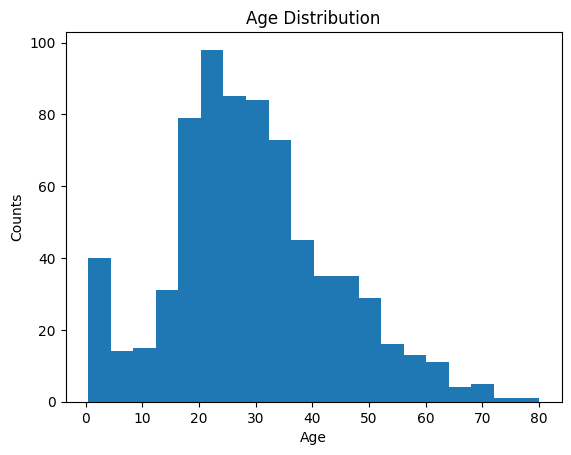

In [18]:
# Plotting a histogram of the 'Age' column
df_titanic['Age'].plot(kind='hist', bins=20, title='Age Distribution')

# adding labels
plt.ylabel('Counts')
plt.xlabel('Age')
plt.show()

#### 3.3.2 Bar Plots for Categorical Data
For categorical data, such as gender or passenger class, a bar plot is often more appropriate. Bar plots visualize the count of occurrences for each category. You can generate bar plots by using:

* [plot(kind='bar',...)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)

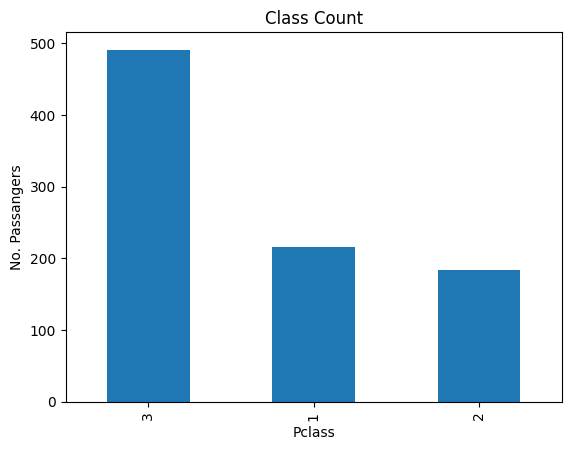

In [19]:
# plotting the number of counts within the Pclass column

# get the value counts for the three classes
passenger_class_counts = df_titanic['Pclass'].value_counts()

# plot the data 
passenger_class_counts.plot(kind='bar', title='Class Count')


# add title labels
plt.xlabel('Pclass')
plt.ylabel('No. Passangers')
plt.show()

_Note_: The code above sorts the plots the according to their occurnce (from highest to lowest). In case you want to have the plot in the correct order you need to sort the indexes of the series we obtained above

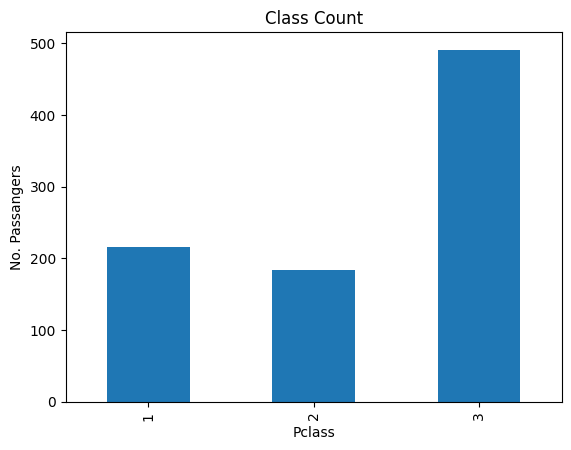

In [20]:
# in case you want to have the plot in the correct order you need to sort the indexes of the series we obtained above
p_class_counts_sorted = passenger_class_counts.sort_index()

p_class_counts_sorted.sort_index().plot(kind='bar', title='Class Count')
plt.xlabel('Pclass')
plt.ylabel('No. Passangers')
plt.show()

### 3.4. Grouping Variables

The Pandas [groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) function is a powerful tool for grouping data by a specific column and performing aggregate calculations, such as computing the mean, sum, or count of a column for each group. This is particularly useful when you want to break down the data into subsets to observe patterns or trends within categories.

#### 3.4.1 Grouping Data by a Single Column

The most common use of  [groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) is to group data by a single column and then perform aggregation. For example, you might want to know the average fare paid by passengers in each class. You can do this by applying the following function to the _groupby object_:

* [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html)

In [21]:
# Grouping by 'Pclass' and calculating the average fare
avg_fare_by_class = df_titanic.groupby('Pclass')['Fare'].mean()

# print the result
print(avg_fare_by_class)

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


#### 3.4.2 Grouping by Multiple Columns

You can also group data by more than one column. For example, you might want to know the survival rate for different classes of 'PClass' and the 'Survived' column.

In [22]:
# group the sub DataFrame by the passenger ticket class and calculate the mean
# as the surviver column is binary encoded, calculating the mean over it gives you the survivor percentage (survival rate)
survival_rate_by_pclass = df_titanic[['Pclass', 'Survived']].groupby('Pclass').mean()

# printing the result
print(survival_rate_by_pclass)

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


You can also plot these results if you want:

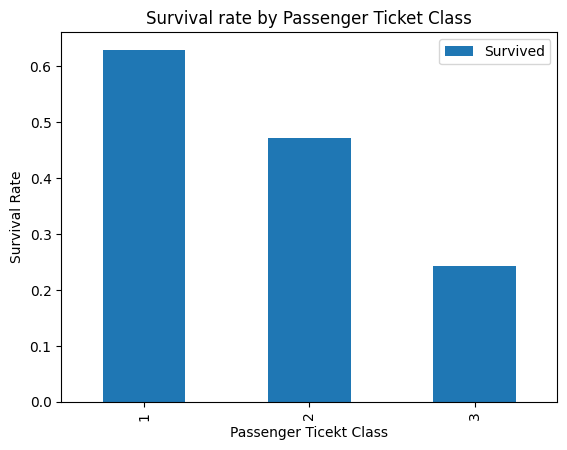

In [23]:
# plot the result
survival_rate_by_pclass.plot(kind='bar', title='Survival rate by Passenger Ticket Class')

# add labels
plt.xlabel("Passenger Ticekt Class")
plt.ylabel("Survival Rate")
plt.show()

#### 1.5.3 Applying Multiple Aggregate Functions
Sometimes, you might want to apply multiple aggregate functions to a grouped dataset. For instance, you could calculate both the mean and the standard deviation of passenger fares for each class. This returns both the average fare and the standard deviation of fares for each class.

You can use this by applying the following function to the _groupby object_:
* [agg()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html)

In [24]:
# Applying multiple aggregate functions
fare_stats = df_titanic.groupby('Pclass')['Fare'].agg(['mean', 'std'])
print(fare_stats)

             mean        std
Pclass                      
1       84.154687  78.380373
2       20.662183  13.417399
3       13.675550  11.778142


## 4 Logical Operations on DataFrames

Logical operations in pandas allow you to filter your DataFrame based on conditions. This is a powerful tool for data analysis, as it enables you to focus on specific rows of data that meet certain criteria. You can think of it as asking questions about your data, like "Which passengers paid more than $100 for their fare?" or "Which patients have an abnormal heart rate?"

### 4.1 Filtering Data Using a Single Condition
You can filter rows of a DataFrame by specifying a condition. __Logical operators__ include:

* <b>></b>: greater than
* <b><</b>: less than
* <b>>=</b>: greater than or equal to
* <b><=</b>: less than or equal to
* <b>==</b>: equal to
* <b>!=</b>: not equal to

You can apply these operators to any column to filter data.

For example, to find all passengers who are older than 50 years:

In [25]:
# Filtering rows where 'Age' is greater than 50. This will return a DataFrame 
df_older_passengers = df_titanic[df_titanic['Age'] > 50]

# printing the first 5 rows of the DataFrame (You can see that the age column only contains values above 50)
df_older_passengers.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


### 4.2 Filter Data Using Multiple Conditions
For combining multiple conditions you can use the following logical operators:

* __AND (&)__: Both conditions must be true.
* __OR (|)__: At least one condition must be true.
* __NOT (~)__: Negates the condition.

For example, to find passengers who were male __and__ paid more than $100 for their ticket:

In [26]:
# Filtering rows where 'Fare' is greater than 100 or 'Pclass' is 1
df_high_fare_or_first_class = df_titanic[(df_titanic['Sex'] == 'male') & (df_titanic['Fare'] > 100)]

# print the number of passengers that were male and paid more than $100 for their ticket
print("Nr. of passengers that were male and paid more than $100: {}".format(df_high_fare_or_first_class.shape[0]))

Nr. of passengers that were male and paid more than $100: 19


### 4.3 Using isin() for Filtering with Lists of Values
The [isin()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html) function allows you to filter rows based on whether a value in a column belongs to a list of values. For example, you might want to find all passengers who embarked from either "C" or "Q":

In [27]:
# Filtering rows where 'Embarked' is either 'C' or 'Q'
df_embarked_c_or_q = df_titanic[df_titanic['Embarked'].isin(['C', 'Q'])]

# print the result
print("Nr. of people that embarked in Cherbourg or Queenstown: {}".format(df_embarked_c_or_q.shape[0]))

Nr. of people that embarked in Cherbourg or Queenstown: 245


## 5. Handling Missing Data

One of the most common challenges in data preparation is dealing with missing values. __Missing data can occur for many reasons such as data entry errors, lost records, or simply because some information was unavailable__. Properly handling missing data is crucial because many machine learning algorithms cannot handle them directly.

### 5.1 Identifying Missing Data
To begin, it’s important to know where the missing values are in the dataset. pandas provides several functions to help with this.

__1. Checking for missing values using the function:__
* [isnull()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html)

In the example below we can see that the first, third, and fourth values of the 'Cabin' column are missing as there value returned value is _True_.

_Note_: The term used for missing (or non-defined) data in programming is __null__. The is_null() function returns the booleans _True_ for missing values and _False_ for non-missing values. 

In [28]:
# Checking for missing values
df_titanic.isnull().head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,False


__2. Summing missing values using the function:__
* [sum()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html)

From the output below you can see again, that the columns 'Age', 'Cabin', and 'Embarked' have missing values.

_Note_: Using sum on booleans returns the number of _True_ values.

In [29]:
# Counting missing values in each column
# this will return a pandas.Series where the index are the column names of the DataFrame
df_titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### 5.2 What to do with Missing Data

Once we’ve identified missing values, we need to decide how to handle them. The two main approaches are:

1. __Dropping missing data__: Removing rows or columns with missing values
2. __Imputing missing data__: Filling in missing values

#### 5.2.1 Dropping Missing Data

If a column or row has too many missing values, or the missing values are not essential, you might want to drop them from the dataset entirely. You can do this using the dropna() function.

__1. Dropping rows with missing values, where at least one column in the row contains a missing value using:__
* [dropna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

_Note_: In cases where a certain column contains a lot of missing values using dropna() along the rows will result in a highly reduced dataset. As you can see below before dropping we had 891 rows of data and after dropping we only have 183. In these cases it might make more sense to remove the column with the missing data instead of dropping the rows.

In [30]:
# printing the number of rows before dropping rows with missing values
print("Number of rows before dropping rows containing missing values: {}".format(df_titanic.shape[0]))

# Dropping rows that have any missing values
df_titanic_dropped_rows = df_titanic.dropna()

# printing the number of rows after dropping rows with missing values
print("Number of rows after dropping rows containing missing values: {}".format(df_titanic_dropped_rows.shape[0]))

Number of rows before dropping rows containing missing values: 891
Number of rows after dropping rows containing missing values: 183


__2. Dropping columns with missing values:__

* [dropna(axis=1)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

_Note_: to drop columns you need to pass 1 to the _axis_ parameter of the dropna() function. The 1 corresponds to the dimension of the DataFrame. In line with programming we usually start to count at zero meaning that the __rows are dimnension 0 while the columns are dimension 1__.

In [31]:
# printing the number of columns before dropping containing missing values
print("Number of columns before dropping columns containing missing values: {}".format(df_titanic.shape[1]))

# Dropping columns that have missing values
titanic_cleaned_cols = df_titanic.dropna(axis=1)

# printing the number of after before dropping columns containing missing values
print("Number of columns before dropping columns containing missing values: {}".format(titanic_cleaned_cols.shape[1]))

Number of columns before dropping columns containing missing values: 11
Number of columns before dropping columns containing missing values: 8


#### 5.2.2 Imputing Missing Data
Instead of dropping rows or columns, a better strategy is often to fill in missing values with a placeholder or a calculated value. This is called imputation. 

However, __imputation should always be done with great care and only for variables where it actually makes sense as imputation can introduce bias into your dataset if not done carefully, especially if a large proportion of values are missing__.

__1. Filling missing values with a constant: You can replace missing values with a specific constant (e.g., 0, or "Unknown" for categorical variables) using:__

* [fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

_Note_: In the case of the titanic dataset it is not really useful to replace the age with 0 as done below. The code sample below just presents how to perform this type of imputation.

In [32]:
# Filling missing 'Age' values with 0
df_titanic_filled_zero = df_titanic.fillna({'Age': 0})

__2. Filling missing values with the mean/median/mode: For numerical columns, in specific cases it might be useful to replace missing values with the mean or median of the column using:__
* [fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

_Note_: In the case of the titanic dataset it is not really useful to replace the age with median as done below. The code sample below just presents how to perform this type of imputation.

In [33]:
# Filling missing 'Age' values with the median
median_age = df_titanic['Age'].median()
df_titanic_filled_median = df_titanic['Age'].fillna(median_age)

### 6 Data Cleaning
Once you've dealt with missing data, the next step in preparing your data for analysis or machine learning is __data cleaning__. Data cleaning involves correcting or removing data that is incorrect, out-of-date, redundant, or formatted inconsistently. Clean data ensures that models can learn effectively from the data without being misled by errors or noise.

#### 6.1 Removing Duplicates

Duplicate rows can distort your analysis and cause bias in machine learning models. Duplicates can occur due to errors in data entry, repeated records, or other issues. pandas provides an easy way to identify and remove duplicates.

_Note_: The titanic dataset does not have any duplicated rows. The code below just shows how to search for and delete duplicated rows.

__1. Finding duplicate rows by using the function:__
* [duplicated()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html)

In [34]:
# Checking for duplicate rows
duplicates = df_titanic.duplicated()

# print the sum of duplicated rows. This equals to the number of duplicated rows
print(duplicates.sum())

0


__2. Removing duplicate rows by using the function:__
* [drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)

In [35]:
# Dropping duplicate rows
titanic_no_duplicates = df_titanic.drop_duplicates()

#### 6.2 Fixing Inconsistent Data Formats
Data can be entered in various formats, especially when working with categorical or textual data. For instance, one column might contain values like "Male" and "male," which pandas would treat as different categories. It's essential to standardize these formats to avoid errors in analysis.

__1. Standardizing text data: Convert text data to a consistent format (e.g., lowercase) to avoid inconsistencies by using the function:__
* [str()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.html)

_Note_: The str() function can call all functions that strings can use (e.g., lower(), split(), replace(), etc.)

In [36]:
# Converting 'Sex' column to lowercase
df_titanic['Sex'] = df_titanic['Sex'].str.lower()

__2. Fixing categorical data inconsistencies: If you notice inconsistencies in categorical variables (e.g., both "M" and "male" are used to represent the same category), you can use the following function for standardization__:
* [replace()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html)

In [37]:
# Replacing 'M' with 'male' and 'F' with 'female'
df_titanic['Sex'] = df_titanic['Sex'].replace({'M': 'male'})

## 7. Feature Engineering

Feature Engineering is the process of transforming raw data into features that better represent the underlying patterns and relationships for machine learning models. The quality and quantity of the features you provide to a model can significantly affect its performance.

Models often benefit from new infered features, created from the original data. Pandas allows to apply mathematical operation on its objects (pandas.Series and pandas.DataFrame).

In this section, we will cover:

* Why feature engineering is important
* Creating new features
* Transforming existing features

### 7.1 Why Feature Engineering is Important
__Raw data often contains noise, irrelevant information, or incomplete variables that don't fully capture the relationships needed for machine learning__. Feature engineering helps create more useful features that can make patterns more visible and machine learning models more effective.

In the context of biomedical data, well-engineered features can represent important medical concepts like patient risk scores, treatment histories, or vitals trends, which can directly improve prediction accuracy.

### 7.2 Creating New Features
Creating new features from existing data can reveal important relationships that weren’t obvious in the raw data.

For example, lets get the number of family members each passenger had by adding the following two columns:
* __SibSp__: The number of siblings or spouses the passenger had aboard the Titanic.
* __Parch__: The number of parents or children the passenger had aboard the Titanic.

As the variable __SibSp__ encodes the number of siblings and spouses, and the variable __Parch__ encodes the number of parents and children, we can infer the size of the family.

We can add a new column to the DataFrame by just defining a new column name and assigning it a value. Be aware that new assigned values have to have the same number of row as the original DataFrame.

In [38]:
# adding a new column to the DataFrame by mathematically adding two columns
df_titanic['FamilySize'] = df_titanic["SibSp"] + df_titanic["Parch"]

### 7.3 Transforming Existing Features
Feature transformations can often improve the predictive power of a dataset by converting non-linear relationships into linear ones or scaling features to a common range.

__1. Log transformations: Taking the logarithm of a feature can help normalize data and reduce the influence of outliers__.

For example, we can log-transform the "Fare" column to deal with large outliers.

In [39]:
 # log1p is used to avoid log(0)
df_titanic['LogFare'] = np.log1p(df_titanic['Fare'])

__2. Binning numerical variables: Sometimes, converting continuous variables into categories or bins can make relationships clearer. For example, we could group passengers into age ranges. You can do this by using the function__:

* [cut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html)

_Note_: The example below categorizes the data into right-inclusive bins. The bins and the corresponding categories are the following:
* (0, 12]: Values greater than 0 and up to and including 12 are categorized as 'Child'.
* (12, 18]: Values greater than 12 and up to and including 18 are categorized as 'Teen'.
* (18, 40]: Values greater than 18 and up to and including 40 are categorized as 'Adult'.
* (40, 60]: Values greater than 40 and up to and including 60 are categorized as 'Middle-Aged'.
* (60, 100]: Values greater than 60 and up to and including 100 are categorized as 'Senior'.

In [40]:
# Binning 'Age' into categories
df_titanic['AgeGroup'] = pd.cut(df_titanic['Age'], bins=[0, 12, 18, 40, 60, 100], labels=['Child', 'Teen', 'Adult', 'Middle-Aged', 'Senior'])

# printing the first 10 rows of the DataFrame. Take a look at the new columns 'FamilySize','LogFare', and 'AgeGroup'
df_titanic.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,LogFare,AgeGroup
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2.110213,Adult
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,4.280593,Adult
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2.188856,Adult
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,3.990834,Adult
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,2.202765,Adult
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,2.246893,NaN
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,3.967694,Middle-Aged
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4,3.094446,Child
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2,2.495954,Adult


## 8. Pandas Profiling

[Pandas Profiling](https://pandas-profiling.ydata.ai/docs/master/index.html) is a python library which generates insightful reports on Pandas datasets.

Note: You (may) need to install it!

In [41]:
# uncomment this line to install the package through pip
# !pip install pandas-profiling 

# alternatively you can also use the conda prompt as described above

In [42]:
from ydata_profiling import ProfileReport

In [43]:
profile = ProfileReport(df_titanic, title="Titanic Profiling", vars={"num": {"low_categorical_threshold": 0}})

In [44]:
profile

In [45]:
profile.to_file("Data/titanic_dataset.html")

### 9. Exercises on Pandas Functionalities

In the following exercises we are going to take a look at the Breast Cancer Wisconisn (Original) Dataset. It was collected by Dr. William Wolberg at the University of Wisconsin, and it is often used for binary classification tasks, particularly in medical diagnosis.

The dataset consists of 699 instances (samples), each representing a different case of breast cancer. Each instance is described by 10 attributes or features, which are mainly integers ranging from 1 to 10. These attributes measure various characteristics of cell nuclei observed in microscopic images. The task is to predict whether the tumor is benign or malignant. This dataset has been widely used for various machine learning and medical research applications.

The datset has the following columns:

1. __Sample_ID__: A unique ID for each instance.
2. __Clump thickness__: Measures the thickness of the cell clumps.
3. __Uniformity of Cell Size__: Measures how similar the sizes of the cells are.
4. __Uniformity of Cell Shape__: Measures how similar the shapes of the cells are.
5. __Marginal Adhesion__: Measures how tightly the cells are bound to each other.
6. __Single Epithelial Cell Size__: Size of the individual epithelial cells.
7. __Bare Nuclei__: Counts the nuclei that lack cytoplasm (this feature may have missing values).
8. __Bland Chromatin__: Assesses the texture of the chromatin in the cell nucleus.
9. __Normal Nucleoli__: Measures the appearance of nucleoli in the cells.
10. __Mitoses__: Measures the number of cells undergoing mitosis.
11. __Diagnosis__: Target variable indicating whether the tumor is bening (2) or malignant (4)

__Exercise 1__:
* Load [Breast Cancer dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data) from UCI Repository
* Display the first 10 rows of the Dataset. 

__Hints__:
* Hint: pandas [pd.read_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) can also load datasets that are stored online. Just pass the link of the website as the parameter to the function. For this to work you need to define the website link as a string.

__Exercise 2__: As you can see, the dataset comes without any column names. Therefore you need to set the columns names with the names defined above.

* Store the columns defined above into a list of strings.
* Override the columns of the DataFrame using the list.
* Display the first 5 columns of the DataFrame to ensure that the column names were actually updated.

__Hints__:
* Hint: The __.columns__ attribute can also be used to set new column names.

__Exercise 3__: There are some rows that are duplicated in the DataFrame, meaning that the entire row of these instances is exactly the same. Having multiple instances of the same data may introduce bias when training a model. Therefore, these need to be removed. But before:

* Find how many duplicated rows exist in the DataFrame.

__Hints__:
* Hint 1: pandas.Series and pandas.DataFrame objects have a [sum()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html) function that you can use to get the number of duplicates.

__Exercise 4__: As you now know that there are duplicate rows in the DataFrame, you need to remove these lines.

* Print the number of rows that the DataFrame has at the moment.
* Drop duplicate lines in the DataFrame.
* Print the number of lines that the DataFrame has after dropping the duplicates.

__Exercise 5__: Even though we removed duplicate lines there are still some instances where the __Sample ID__ column has the same number, but the rest of the data (the other columns) is different. These instances of data can be considered __noisy data__, because they point to the same sample but have different values for this sample. It is always necessary to remove __noisy data__, as this will lead to sub-optimal training of a model. 

* Check if Sample ID is actually unique

__Hints__: 
* Hint 1: You can do that by looking at the __number of unique__ values inside the 'Sample ID' column and compare that to the total number of samples in the DataFrame. 

__Exercise 6__: Now that you know that there a these instances where the Sample_ID is duplicated, you need to find out which of the rows have the same Sample_ID. For that you need to get the index of these rows. 

* Get the indices of the rows where 'Sample ID' column has duplicated values

__Hints__:
* check the [pandas.duplicated()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) function. It can be used with a certain parameter so that it only looks for duplicates in a certain column.
* The returned boolean pandas.Series can be used to retrieve only the rows containing duplicates from the DataFrame. 
* In the introduction section there is an example on how to get the __index__ of a DataFrame.

__Exercise 7__: Now you need to remove those rows containing the __noisy data__

* Print the number of rows that the DataFrame has at the moment.
* Drop rows containing the duplicated data.
* Print the number of rows after dropping the rows to ensure you actually dropped the rows.

__Hints__:
* Hint 1: You can either use the indices you obtained by passing them to the [drop()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) function
* Hint 2: Or you can use [drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) and use a particular parameter of the function.

__Exercise 8__: Set Sample ID as dataframe index

__Exercise 9__: For some reason the __Bare Nuclei__ column is read as an _object_ event though it should contain only integer values. There is a particular reason for this as the researcher compiling the dataset set a specific value if the data was missing.

* Check column types using `df.info()` and confirm that the Type for __Bare Nuclei__ is acutally _object_.
* Find out which is the value that the research set for missing data.

__Hints__: 
* There is a code example provided above that might help you finding this out

__Exercise 10__: Now that you know which is the value the researcher used for missing values you can clean your data by removing rows that contain the missing value in the __Bare Nulcei__ column. 
* Remove Sample IDs with missing values
* Convert Bare Nuclei to Type int
* Get the info() of the DataFrame after converting the column to int and check if all types are now _int64_ or _int32_.

__Hints__:
* Hint 1: This can be solved using a logical operation
* Hint 2: Check the function [astype()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html) for converting the column to int.

## 10. Features, Target Class and Splitting data

Before building a machine learning model, it’s important to split your dataset into separate training and testing sets. This allows you to evaluate how well your model performs on new, unseen data. If you use the entire dataset for training, your model might learn to "memorize" the data instead of generalizing to new cases. However, before we want to split our data, there are two steps that need to be done:

1. Encoding of Categorical Variables
2. Defining the features and the Target class.

For this section we will use [scikit-learn library](https://scikit-learn.org/stable/index.html). It provides functions for all the steps we need to perform.

_Note_: If you haven't installed scikit-learn yet, you can install it using pip or conda as described at the beginning of this notebook.

In [46]:
# importing necesary function from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

### 10.1 Encoding of Categorical Variables
Endcoding of categorical variables is a part of __Feature Engineering__. Machine learning models often require categorical variables to be represented numerically. There are different ways to encode categorical features

#### 10.1.1 Label Encoding
This replaces each category with a unique number. For example, in the Titanic dataset, the column 'Sex' needs to be encoded as integers 'male': 0 and 'femal':1.

<div>
<img src="attachment:ordinal.png" width="400"/>
</div>

To perform this encoding we will use scikit-learn's:
* [LabelEncoder()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [47]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Assuming the 'Sex' column exists in your DataFrame 'titanic_df'
# Fit and transform the 'Sex' column to encode the values
df_titanic['SexEncoded'] = le.fit_transform(df_titanic['Sex'])

# Display the first few rows to check the new 'SexEncoded' column (just displaying the 'Sex' and the new 'SexEncoded' column)
df_titanic[['Sex', 'SexEncoded']].head()

,Sex,SexEncoded
PassengerId,,
1,male,1
2,female,0
3,female,0
4,female,0
5,male,1


#### 10.1.2 One-Hot Encoding
One-hot encoding is a process used to convert categorical variables into a format that can be provided to machine learning algorithms. Instead of assigning a single number to each category, one-hot encoding creates new binary columns—one for each unique category. Each column contains a 1 if the category is present and a 0 otherwise. This avoids giving numerical meaning or rank to the categories, which could mislead machine learning models.

<div>
<img src="attachment:one_hot.png" width="500"/>
</div>

For example, in the Titanic dataset, the column 'Embarked' needs to be one-hot encoded. This will result in three new columns 'Embarked C', 'Embarked_Q', 'Embarked_S'.

To perform this encoding we will use scikit-learn's:
* [OneHotEncoder()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

_Note_: When we use one-hot encoding to convert categorical variables into a numerical format, each unique category is represented by a separate binary column. For example, the 'Embarked' column in the Titanic dataset has three categories: 'C' (Cherbourg), 'Q' (Queenstown), and 'S' (Southampton).

With one-hot encoding, we create new columns for each category, where each column contains a 1 if the category is present and a 0 if it is not. However, to avoid a problem called the __dummy variable trap__, we often choose to drop one of these columns. The dummy variable trap occurs when the model receives redundant information from all the encoded columns, which can lead to multicollinearity and inflated variance in our model’s estimates.

For simplicity, __we do not consider the dummy variable trap in the code below__.

In [48]:
# Remove rows where 'Embarked' is NaN
df_titanic = df_titanic.dropna(subset=['Embarked'])

# Initialize the OneHotEncoder without dropping the first category
encoder = OneHotEncoder(sparse=False)

# Reshape the 'Embarked' column and fit-transform using OneHotEncoder
embarked_encoded = encoder.fit_transform(df_titanic[['Embarked']])

# Convert the result into a DataFrame for easier handling
df_encoded = pd.DataFrame(embarked_encoded, columns=encoder.get_feature_names_out(['Embarked']))

# Concatenate the new one-hot encoded columns to the cleaned DataFrame
titanic_df_cleaned = pd.concat([df_titanic.reset_index(drop=True), df_encoded], axis=1)

# Display the first few rows (just displaying the relevant columns)
titanic_df_cleaned[['Embarked', 'Embarked_C', 'Embarked_Q', 'Embarked_S']].head(5)

,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,S,0.0,0.0,1.0
1,C,1.0,0.0,0.0
2,S,0.0,0.0,1.0
3,S,0.0,0.0,1.0
4,S,0.0,0.0,1.0


### 10.2 Understanding Features and the Target Class
In a machine learning model, we work with two key components: __features__ (also called predictors or independent variables) and the __target class__ (also called the dependent variable or label). Understanding the distinction between these is crucial for framing and solving a predictive task.

#### 10.2.1 What are Features?
Features are the input variables or attributes that describe the data. These can be numerical values (e.g., age, salary) or categorical values (e.g., gender, city). In the context of machine learning, the model uses these features to learn patterns and make predictions.

For example, in the Titanic dataset, some common features we might use to predict whether a passenger survived or not include:

* __Pclass__: The class of the ticket (1st, 2nd, or 3rd class)
* __Age__: The age of the passenger
* __Fare__: The amount paid for the ticket
* __Sex__: Gender of the passenger (which we'll encode numerically)
* __Embarked__: The port from which the passenger boarded the Titanic (which we'll also encode numerically)


#### 10.2.2 What is the Target Class?
The target class (or simply target) is the variable we aim to predict based on the features. In classification tasks, the target is often a categorical value representing different classes. In regression tasks, the target is typically a continuous numerical value.

For the Titanic dataset, the target class is:

* __Survived__: A binary variable indicating whether a passenger survived (1) or not (0).


#### 10.1.3 Defining Features and the Target in pandas
When preparing data for a machine learning model, we separate the features and the target. Using pandas, this is done by creating two variables:

* __X__: Contains the features (predictor variables).
* __y__: Contains the target class (the value we want to predict).

In [49]:
# dropping rows where column 'Age' is NaN
df_titanic = df_titanic.dropna(subset=['Age'])

# Define the features (X) and the target (y)
X_titanic = df_titanic[['Pclass', 'Age', 'Fare', 'SexEncoded']]  # Add other features as needed 
y_titanic = df_titanic['Survived']

### 10.2 Why Splitting Data is Important
When building machine learning models, it's essential to split your dataset into separate parts to ensure you can evaluate your model's performance properly. The most common splits are:

* __Training Set__: The portion of the data the model learns from.
* __Validation Set__: A smaller part of the training data used for tuning model parameters and preventing overfitting.
* __Testing Set__: The final portion of data used to evaluate the model's performance on unseen data.

<div>
<img src="attachment:train_test.png" width="650"/>
</div>

Depending on the use case and the characteristics of the dataset, the data scientist (aka you!) must decide which approach to use to ensure the most reliable results.

#### 10.2.1 Train-Test Split

In simpler workflows, data is often split into just training and testing sets. This ensures the model is evaluated on data it has not seen during training. Usual poprotions of Train and Test sets are:
* Training Set (70 - 90 %): Used to fit the model.
* Testing Set (10 - 30 %): Used to evaluate the final model performance.

#### 10.2.2 Train-Validation-Test Split
If it is also needed to fine-tune some hyperparameters you can also use the following split:

* Training Set (e.g., 60% of the data): Used to fit the model.
* Validation Set (e.g., 20% of the data): Used for tuning hyperparameters and selecting the best model. The model evaluates itself against this set during training to avoid overfitting.
* Testing Set (e.g., 20% of the data): Used to evaluate the final model performance after tuning is complete.

This ensures that you have a fair estimate of how the model performs on new data without overfitting or bias from the validation step.

### 10.3 How to Split Data in pandas
For splitting the data into Train and Test sets we can use the function:
* [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

_Note_: In the example below we use a 80/20 split for train/test

In [50]:
# split the data into training + validation and testing sets: 80% train_val, 20% test (it is only necessary to define the test size)
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(X_titanic, y_titanic, test_size=0.2)

### 10.4. Exercises

__Exercise 1__: Encode the target variable of the Breast Cancer Dataset. 

As the Breast Cancer Dataset uses the following values:
* __bening__: 2
* __malignant__: 4

A __label encoding__ of the data is necessary.

__Exercise 2__: Select the X and y data for the Breast Cancer Dataset

__Exercise 3__: Divide the Breast Cancer dataset into training and testing set using a random percentage of 70/30 for train and test, respectivetly. 

## 11. Scaling

__Feature scaling__ is crucial in machine learning because it ensures that all features contribute equally to the model, preventing any single feature with a larger range of values from dominating the learning process. Many algorithms, such as K-Nearest Neighbors (KNN), Support Vector Machines (SVM), and Gradient Descent-based models (i.e., Deep Learning models), rely on the distance between data points. If features are on different scales, it can distort the distances and lead to poor performance. Scaling also speeds up the convergence of optimization algorithms, making training more efficient. Overall, feature scaling improves model accuracy and training stability.

Scikit-learn also provides the functionality for scaling data. The two main scalsers are:

* [MinMaxScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
* [StandardScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

When scaling data for machine learning, it's crucial to apply the transformation to the train and test sets carefully to avoid introducing bias. The key principle is that the test set should represent unseen data, simulating how the model will perform in real-world scenarios. In real-world scenarios we do not know the statistics of the data, thus we have to assume that the distribution of the training data is represantitve enough to reflect any new unseen data.

>__Therefore, the scaling parameters (e.g., mean and standard deviation for StandardScaler, or min and max for MinMaxScaler) must be computed from the training set and then applied to both the training and test sets. If you scale the test data using its own statistics, this can lead to data leakage, where information from the test set influences the model and results in overly optimistic performance metrics.__

Fortunately, the MinMaxScaler() and StandardScaler() handle most of this for us.

_Note 1_: applying a scaler to a pandas.DataFrame will return a numpy.array object. In case you want a pandas.DataFrame object again, you have to convert the output back to a pandas.DataFrame. This however not really necessary. Either way, the code snippets below show how you can obtain a pandas.DataFrame again after applying the scaler.

_Note 2_: The code snippets below do not check whether or not it makes sense to use Min-Max or Standard Scaling on the whole dataset. They just show how you can use the scalers to scale your data.

### 11.1. Min-Max Scaling

MinMax scaling is a normalization technique that transforms features to a specific range, typically between 0 and 1. It rescales each feature based on the formula:

$$X_{min-max} = {X - X_{min} \over X_{max} - X_{min}}$$

where $X_{min}$ and $X_{max}$ are the minimum and maximum values of the feature, respectively. This ensures all features have the same scale, preserving the relationships between values while eliminating distortions caused by differing ranges.

#### 11.1.1 When to use MinMax scaling:
* For distance-based algorithms like K-Nearest Neighbors (KNN) or Neural Networks.
* When features are not normally distributed.
* In scenarios where feature ranges are bounded, such as pixel intensities in image processing.

#### 11.1.2 Downsides of MinMax scaling:
* Sensitive to outliers, as they can significantly affect the scaling range.
* Does not change the shape of the data distribution, which may be a drawback for features with skewed distributions.

In [51]:
# importing scaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [52]:
# defining min max scaler and its range
min_max_scaler = MinMaxScaler(feature_range=(0, 1))

# fit the scaler to train set and scale the train data (this will return a numpy.array)

X_train_titanic_minmax = min_max_scaler.fit_transform(X_train_titanic)

# scale the test data using the scaler that was fitted on the training data
X_test_titanic_minmax = min_max_scaler.transform(X_test_titanic)

# print the first 5 rows of the numpy.array containing the training data
print("The first 5 rows of the X_train_bc_minmax numpy.array are: \n{}".format((X_train_titanic_minmax[:5, :])))

# converting the training and test data back to a pandas.DataFrame (using the column names of the X_bc DataFrame)
df_X_train_titanic_minmax = pd.DataFrame(X_train_titanic_minmax, columns=X_titanic.columns)
df_test_titanic_minmax = pd.DataFrame(X_test_titanic_minmax, columns=X_titanic.columns)

# print the first 5 rows of the DataFrame containing the training data
df_X_train_titanic_minmax.head(5)

The first 5 rows of the X_train_bc_minmax numpy.array are: 
[[1.         0.39997273 0.01571255 1.        ]
 [1.         0.27723987 0.03142511 1.        ]
 [1.         0.29087686 0.01415106 0.        ]
 [1.         0.20905496 0.0150944  0.        ]
 [0.5        0.27723987 0.14346245 1.        ]]


,Pclass,Age,Fare,SexEncoded
0,1.0,0.399973,0.015713,1.0
1,1.0,0.277240,0.031425,1.0
2,1.0,0.290877,0.014151,0.0
3,1.0,0.209055,0.015094,0.0
4,0.5,0.277240,0.143462,1.0


### 11.2. Standard Scaling

Standard scaling is a technique that centers features by subtracting the mean and scales them by dividing by the standard deviation. The formula is:

$$X_{standard} = {X - \mu \over \sigma}$$

where $\mu$ is the mean and $\sigma$ is the standard deviation of the feature. This process results in a distribution with a mean of 0 and a standard deviation of 1, making the features comparable in terms of variance

#### 11.2.1 When to use Standard scaling:
* For algorithms that assume features are normally distributed, such as Linear Regression, Logistic Regression, and Support Vector Machines (SVM).
* When features have different units or large variance differences.
* In cases where preserving outlier relationships is important, as standard scaling does not compress the range like MinMax scaling.

#### 11.2.2 Downsides of Standard scaling:
* May not perform well if the data is not normally distributed.
* Outliers can still affect the scaling, as they contribute to the calculation of the mean and standard deviation.

In [53]:
# define scaler
std_scaler = StandardScaler()

# fit the scaler to train set and scale the train data (this will return a numpy.array)
X_train_titanic_std = std_scaler.fit_transform(X_train_titanic)

# scale the test data using the scaler that was fitted on the training data
X_test_titanic_std = std_scaler.transform(X_test_titanic)

# print the first 5 rows of the numpy.array containing the training data
print("The first 5 rows of the X_train_bc_std numpy.array are: \n{}".format((X_train_titanic_std[:5, :])))

# converting the training and test data back to a pandas.DataFrame (using the column names of the X_bc DataFrame)
df_X_train_titanic_std = pd.DataFrame(X_train_titanic_std, columns=X_train_titanic.columns)
df_X_test_bc_std = pd.DataFrame(X_test_titanic_std, columns=X_train_titanic.columns)

# print the first 5 rows of the DataFrame containing the training data
df_X_train_titanic_std.head(5)

The first 5 rows of the X_train_bc_std numpy.array are: 
[[ 0.90926772  0.00179247 -0.47828948  0.73337428]
 [ 0.90926772 -0.62052906 -0.32911891  0.73337428]
 [ 0.90926772 -0.55138222 -0.49311388 -1.36356022]
 [ 0.90926772 -0.96626324 -0.48415809 -1.36356022]
 [-0.29392608 -0.62052906  0.73453208  0.73337428]]


,Pclass,Age,Fare,SexEncoded
0,0.909268,0.001792,-0.478289,0.733374
1,0.909268,-0.620529,-0.329119,0.733374
2,0.909268,-0.551382,-0.493114,-1.363560
3,0.909268,-0.966263,-0.484158,-1.363560
4,-0.293926,-0.620529,0.734532,0.733374


### 11.3. Exercise

__Exercise 1__: Although the Breast Cancer dataset is already normalized between 1 and 10, apply Min-Max scaling to the data.

_Note_: you don't need to transform the output back to a pandas.DataFrame.